# Trading Costs

### Intro

In the paper "Trading Costs" (Frazzini, Israel, Moskowitz, 2018), the authors used $1.7$ trillion dollars of live trade execution data from a large institutional money manager across $21$ developed equity markets over a $19$-year period to develop a model for measuring real-world trading costs and the price impact function of a large trader. The paper discusses factors driving trading costs. The authors found that market structure has limited explanatory power for price impact costs, and there is no significant effect from transaction taxes, short-sale uptick rules, or other exchange rules on costs. Within a market, the authors found that price impact costs rise with market volatility. They also showed that price impact costs have exhibited a steady decline over time across markets. They found that the price impact cost is larger for smaller stocks and stocks with greater idiosyncratic risk. Finally, they found that the most important variable determining price impact is the size of the trade (measured as the fraction of daily volume traded in a stock), where larger trades generate greater price impact. The relationship they found between price impact and trade size is a power-law function with a coefficient close to $1/2$. They, therefore, approximate price impact with a square root function in trade size. 

### Measuring Trade Costs

Variables collected for trades:
- Model implied price: $P^{\text{theory}}$
- Arrival Price: $P^{\text{start}}$
- Execution Price: $P^{\text{ex}}$
- Execution Quantity: $Q^{\text{ex}}$
- Weighted Average Executed Trade on day t Price: $P^{\text{ex, t}}$
- Closing price of the stock on the next trading day following execution: $P^{\text{t+1}}$

$$\text{Cost}_{\text{execution}} = Q^{\text{ex}}(P^{\text{ex}} - P^{\text{theory}})$$

Market Impact:
$$\text{MI} = Q^{\text{ex}}(P^{\text{ex}} - P^{\text{start}})$$

- The authors found very little difference between market impact and slippage, with an expected value of 0.

Breaking down Market Impact into two parts:
$$MI^{\text{temp}} = Q^{\text{ex, t}}(P^{\text{ex, t}} - P^{\text{t+1}})$$
$$MI^{\text{perm}} = MI - MI^{\text{temp}}$$

- Temporary price impact is the local day-to-day price impact, which may reverse by the next day.
- Permanent price impact is the temporary part that stays the following trading day.

### Market Impact Model

The authors' price impact model is based on 1) market conditions, 2) stock characteristics, and 3) trade size, calibrated to both U.S. and international live executed trades. 

Variables:
- Market returns: $r^{\text{mkt}}_t$
- DGTW returns: $r^{\text{dgtw}}_t$
- "buysell" is a dummy equal to 1 for buy orders and -1 for sell orders.
- "Time trend" is a linear time trend.
- Log of ME is equal to the log of 1 plus the market value of equity, where ME is in billions of USD.
- IV - "Idiosyncratic Volatility" is the volatility of the residuals of a regression of one-year daily stock returns on the corresponding value-weighted benchmark (annualized %).
- "VIX" is the monthly variance of the CRSP-value-weighted index, computed using daily returns (annualized %).
- $𝑥 = 100 \times \frac{𝑚}{𝑑𝑡𝑣}$ is signed dollar volume (m) as a fraction (in %) of the stock’s average past one-year dollar volume ($𝑑𝑡𝑣$).

$$ 
MI_t = \theta_0 + \theta_1 r^{\text{mkt}}_t \text{buysell} + \theta_2 \text{time trend} + \theta_3 \log(me_{t-1}) + \theta_4 x_{t-1} + \theta_5 \text{sign}(x_{t-1})\sqrt{|x_{t-1}|} + \theta_6 \sigma^{\text{IV}}_{t-1} + \theta_7 \text{VIX}_{t-1} + \theta_8 r^{\text{dgtw}}_t \text{buysell} + \epsilon_t 
$$

The authors' estimates for the parameters from regression on their sample data:
- $\text{timetrend} = -0.01$
- $\log(\text{ME}) = -0.62$
- $IV = 0.28$
- $\text{VIX} = 0.15$

Note that the right-hand side of the equation is completely known before the trade except for the returns $r^{\text{mkt}}_t$ and $r^{\text{dgtw}}_t$. Therefore, to compute a measure of expected Market Impact, the authors set $E[r^{\text{dgtw}}_t] = E[r^{\text{mkt}}_t] = 0$:

$$
MI = a + bx + c \text{sign}(x)\sqrt{|x|}
$$

- $a = \theta_0 + \theta_2 \text{time trend} + \theta_3 \log(me_{t-1}) + \theta_6 \sigma^{\text{IV}}_{t-1} + \theta_7 \text{VIX}_{t-1}$
  - The constant $a$ controls for the general level of trading costs as well as for the components of trading costs that do not depend on trade size, such as commissions (which are captured in our execution prices).
- $b = \theta_4$
- $c = \theta_5$

### Implementing the model

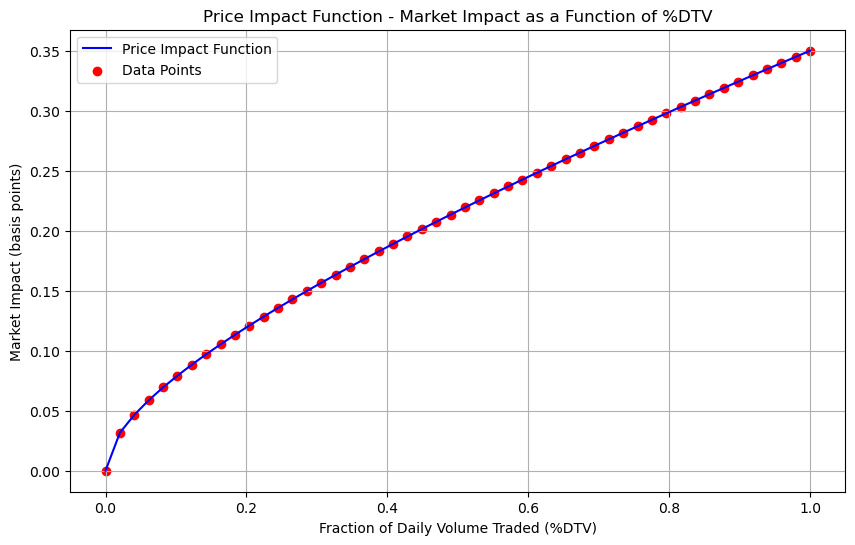

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def market_impact(x, timetrend, log_ME, IV, VIX, theta):
    a = theta[0] + timetrend + log_ME + IV + VIX
    b = theta[4]
    c = theta[5]
    
    return a + b * x + c * np.sign(x) * np.sqrt(np.abs(x))

# paramaters
timetrend = -0.01
log_ME = -0.62
IV = 0.28
VIX = 0.15
theta = [0.2, 0, 0, 0, 0.15, 0.2, 0, 0]

# Example Plot
# Fraction of daily volume traded (%DTV or x)
x_values = np.linspace(0, 1, 50)

market_impacts = [market_impact(x_val, timetrend, log_ME, IV, VIX, theta) for x_val in x_values]
plt.figure(figsize=(10, 6))
plt.plot(x_values, market_impacts, label='Price Impact Function', color='blue')
plt.scatter(x_values, market_impacts, color='red', label='Data Points')
plt.xlabel('Fraction of Daily Volume Traded (%DTV)')
plt.ylabel('Market Impact (basis points)')
plt.title('Price Impact Function - Market Impact as a Function of %DTV')
plt.grid(True)
plt.legend()
plt.show()

Frazzini, Andrea and Israel, Ronen and Moskowitz, Tobias J. and Moskowitz, Tobias J., Trading Costs (April 7, 2018). Available at SSRN: https://ssrn.com/abstract=3229719 or http://dx.doi.org/10.2139/ssrn.3229719